# Network Study of Dietary Restrictions on Minerva University Students for Friendsgiving
This notebook contains the data processing to develop the the small-world network simulation presented in the article, CX50 - Complex System Analysis Case Study.

### Source
Anonymized Dietary Restrictions Student Survey conducted by the Friendsgiving Cooking Commission, headed by Atai Bekboev (Minerva Class of 2027). 

* [Raw Survey Data for Additional Verification (emails have been hidden by default)](https://docs.google.com/spreadsheets/d/1O54bSypaOTQJr3gYOQaTdtlhac7qoXh2K1euwqH12es/edit?usp=sharing)

### Summary of Processing Steps from Raw Survey Data
1. Deleting responses from duplicated emails to maintain consistency that every responses represents one student;
1. Anonymization: exlusion of the email column, originally used to check for the institutional email, and its substitution for a unique id column ;
2. Manually filtering open ended responses related to food allergies from the 9 main food allergens described by the FDA;
3. Dropping columns related to food restrictions outside the scope of allergies, including personal preferences for vegan or vegetarian menu, or religious restrictions;
3. Inclusion of a new columns:
    a. allergic (BOOL): described whether a student has a food allergy or not;
    b. gluten, lactose, egg, tree_nuts (BOOL): columns that describe whether a student has an allergy to one of the particular allergens aforementioned.

[Resulting Database (df)](https://docs.google.com/spreadsheets/d/17ox2iGns1bjCG1ObPgaBlDUxYOEAppqmMGf3DSWoBk0/edit?usp=sharing)

# Steps for the Development of the Small World Network
This network was simulated using the web-based tool [Flourish](https://app.flourish.studio/), which requires the upload of databases describing the links between source and target nodes, as well as the points that represent the individual responses. For that purpose, the final output of this notebook is a database of connection between nodes.

To develop this database, I studied and applied the [NetworkX](https://networkx.org/documentation/stable/index.html) library. Namely the following functions:
* **gnm_random_graph(n, m, seed=None, directed=False)**
Returns a random graph given a number of nodes (n), the number of edges (m), an indicator of the random number generation state (seed) and a boolean value of whether the graph is directed or not.  
* **watts_strogatz_graph(n, k, p, seed=None)**
Returns a Watts–Strogatz small-world graph given the number of nodes (n), the number of k nearest neighbors each node is joined with in a ring topology, the probability of rewiring each edge (p), and the indicator of a random number generation state (seed).

Finally, I transformed the graph information on an edge list, composed of a list of tuples which can be grouped in a dataframe of links between source and target nodes. 

## Visualizing the Prevalence of Food Allergies in Friendsgiving

In [9]:
# Importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading database
df = pd.read_csv('/Users/marina.levay/Downloads/dietary_restrictions_friendsgiving.csv')

# Removing email columns for anonymity
df = df.drop(columns='email')

Text(0, 0.5, 'Frequency')

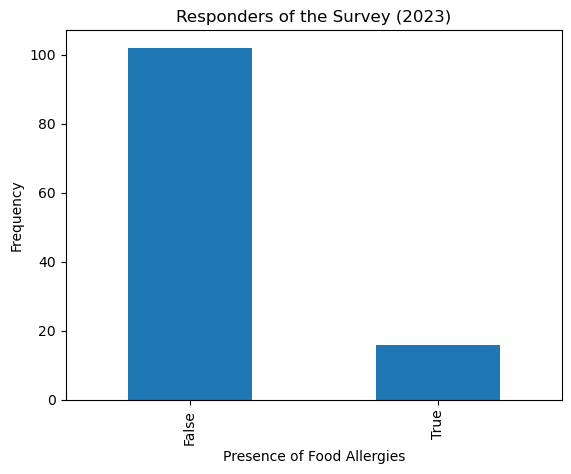

In [23]:
# Plot the frequency of allergic and non-allergic students in the survey
df['allergic'].value_counts().plot(kind='bar', title='Responders of the Survey (2023)')
plt.xlabel('Presence of Food Allergies')
plt.ylabel('Frequency')

## Visualizing Specific Food Allergies
Plotting a bar plot with the breakdown of self-declared allergies in the survey

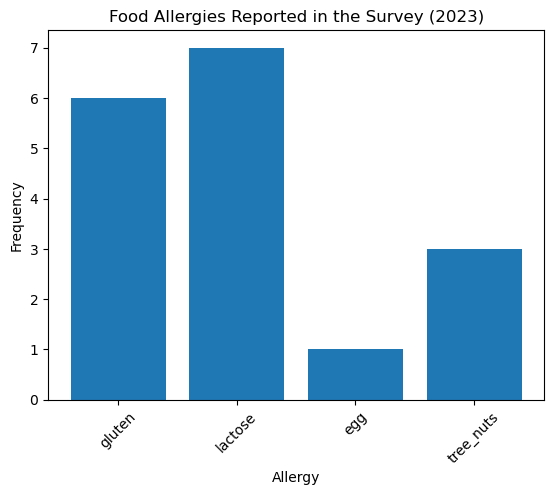

In [20]:
# Initializing an empty dictionary to store allergy counts
allergy_counts = {}

# Filtering the DataFrame to keep only rows with True values and drop rows with all NaN values
df_true_only = df[df == True].dropna(how='all')

# Calculating and store the counts of each type of allergy
allergy_counts['gluten'] = df_true_only['gluten'].sum()
allergy_counts['lactose'] = df_true_only['lactose'].sum()
allergy_counts['egg'] = df_true_only['egg'].sum()
allergy_counts['tree_nuts'] = df_true_only['tree_nuts'].sum()

# Creating a bar plot using allergy names as x-axis labels and their corresponding counts as bar heights
plt.bar(allergy_counts.keys(), allergy_counts.values())

# Setting labels and title for the plot
plt.xlabel('Allergy')
plt.ylabel('Frequency')
plt.title('Food Allergies Reported in the Survey (2023)')

# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Displaying the bar plot
plt.show()



## Small World Network Graph

In [3]:
import networkx as nx

# Create a random graph with 118 nodes and 236 edges
graph = nx.gnm_random_graph(118, 236)

# Rewire edges to create a small-world network
graph = nx.watts_strogatz_graph(118, 4, 0.1)

# Convert graph to an edge list
edge_list = list(graph.edges())
database = []

# Fill the database by transforming each tuple pair form the edge list into a list itself
for e in edge_list:
    database.append(list(e))

# Transform the database (list) into a Pandas Dataframe
links_df = pd.DataFrame(database, columns=['id_source', 'id_target'])
    
links_df

,id_source,id_target
0,0,117
1,0,116
2,0,47
3,0,25
4,1,2
...,...,...
231,114,115
232,114,116
233,115,116
234,115,117


## Exporting the database

In [25]:
links_df.to_csv('main/small_world_links.csv')